In [8]:
import random
import math
import pandas as pd
import sklearn.model_selection
import sklearn.linear_model
import sklearn.ensemble
import sklearn.metrics
from sklearn import svm
import matplotlib.pyplot as plt

In [34]:
DATASET = '../datasets/spam.csv'
data = pd.read_csv(DATASET)

In [32]:
def calc_joint_log_likelihood(data):
    means = [[], []]
    variances = [[], []]
    for number in [0,1]:
        for feature in data.drop('label', axis=1):
            feature_values = data[data['label'] == number][feature]
            means[number].append(feature_values.mean())
            variances[number].append(feature_values.var())
    
    def formula(x, m, v):
        return - 1 / 2 * math.log(2 * math.pi * v) - (x - m) ** 2 / (2 * v)
    
    ans = [[], []]
    for number in [0, 1]:
        for index, row in data.iterrows():
            ans[number].append(0)
            for value_index, value in enumerate(row.drop('label')):
                ans[number][index] += formula(value,
                                              means[number][value_index],
                                              variances[number][value_index])
    return ans

def plot(jll, label):
    fpr, tpr, _ = sklearn.metrics.roc_curve(
        label,
        [jll[1][i] - jll[0][i] for i in range(len(jll[0]))])
    plt.plot(fpr, tpr, 'b-')
    plt.show()

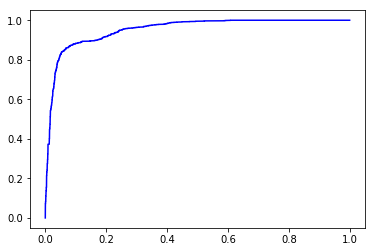

In [33]:
jll = calc_joint_log_likelihood(data)
plot(jll, data['label'])

In [35]:
DATASET = '../datasets/cancer.csv'
data = pd.read_csv(DATASET)
data['label'] = [1 if v == 'M' else 0 for v in data['label']]

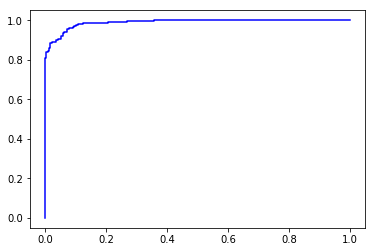

In [36]:
jll = calc_joint_log_likelihood(data)
plot(jll, data['label'])